In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['flower'] = iris.target
df['flower']=df['flower'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


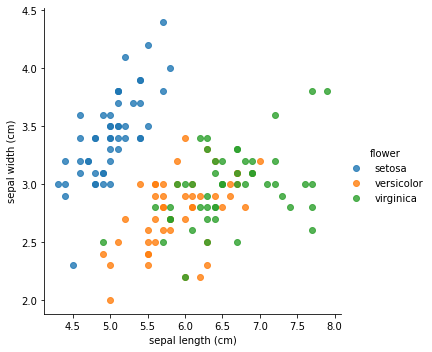

In [8]:
sns.lmplot('sepal length (cm)','sepal width (cm)',data = df,hue = 'flower',fit_reg=False)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.25)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
knn.score(x_test,y_test)

0.9736842105263158

In [15]:
from sklearn.model_selection import GridSearchCV

In [19]:
clf=GridSearchCV(KNeighborsClassifier(),
                 param_grid = {
                     'n_neighbors' : [x for x in range(3,21)]
                 },cv=5,return_train_score=False)

In [23]:
clf.fit(iris.data,iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00130992, 0.00107799, 0.00136461, 0.00100536, 0.00104227,
        0.00109677, 0.0010941 , 0.00102654, 0.00134492, 0.00103559,
        0.00097198, 0.00255036, 0.00100722, 0.00388484, 0.00535316,
        0.00097961, 0.00277967, 0.00206451]),
 'mean_score_time': array([0.00608878, 0.00616722, 0.00374999, 0.00328221, 0.00426354,
        0.0037672 , 0.00386324, 0.00336475, 0.00333815, 0.0062192 ,
        0.00319877, 0.00579882, 0.01118655, 0.01054544, 0.00921779,
        0.00952849, 0.01112494, 0.01364412]),
 'mean_test_score': array([0.96666667, 0.97333333, 0.97333333, 0.98      , 0.98      ,
        0.96666667, 0.97333333, 0.98      , 0.98      , 0.98      ,
        0.97333333, 0.96666667, 0.96666667, 0.96666667, 0.96666667,
        0.96666667, 0.96666667, 0.96      ]),
 'param_n_neighbors': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20],
              mask=[False, False, False, False, False, False, False,

In [25]:
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001310,0.000455,0.006089,0.003629,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,10
1,0.001078,0.000037,0.006167,0.003056,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,6
2,0.001365,0.000728,0.003750,0.001007,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6
3,0.001005,0.000079,0.003282,0.000139,6,{'n_neighbors': 6},0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
4,0.001042,0.000047,0.004264,0.001561,7,{'n_neighbors': 7},0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
5,0.001097,0.000155,0.003767,0.000171,8,{'n_neighbors': 8},0.966667,1.000000,0.933333,0.933333,1.0,0.966667,0.029814,10
6,0.001094,0.000019,0.003863,0.000153,9,{'n_neighbors': 9},0.966667,1.000000,0.966667,0.933333,1.0,0.973333,0.024944,6
7,0.001027,0.000066,0.003365,0.000071,10,{'n_neighbors': 10},0.966667,1.000000,1.000000,0.933333,1.0,0.980000,0.026667,1
8,0.001345,0.000842,0.003338,0.000388,11,{'n_neighbors': 11},0.933333,1.000000,1.000000,0.966667,1.0,0.980000,0.026667,1
9,0.001036,0.000032,0.006219,0.003351,12,{'n_neighbors': 12},0.933333,1.000000,1.000000,0.966667,1.0,0.980000,0.026667,1


In [26]:
results = results[['params','mean_test_score']]
results

,params,mean_test_score
0,{'n_neighbors': 3},0.966667
1,{'n_neighbors': 4},0.973333
2,{'n_neighbors': 5},0.973333
3,{'n_neighbors': 6},0.980000
4,{'n_neighbors': 7},0.980000
5,{'n_neighbors': 8},0.966667
6,{'n_neighbors': 9},0.973333
7,{'n_neighbors': 10},0.980000
8,{'n_neighbors': 11},0.980000
9,{'n_neighbors': 12},0.980000


In [27]:
results.sort_values(by='mean_test_score',ascending=False)

,params,mean_test_score
9,{'n_neighbors': 12},0.980000
3,{'n_neighbors': 6},0.980000
4,{'n_neighbors': 7},0.980000
7,{'n_neighbors': 10},0.980000
8,{'n_neighbors': 11},0.980000
2,{'n_neighbors': 5},0.973333
6,{'n_neighbors': 9},0.973333
1,{'n_neighbors': 4},0.973333
10,{'n_neighbors': 13},0.973333
13,{'n_neighbors': 16},0.966667


In [29]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9736842105263158

In [30]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 14]])

([<matplotlib.axis.YTick at 0x7f8b481310d0>,
 [Text(0, 0.5, 'setosa'),
  Text(0, 1.5, 'versicolor'),
  Text(0, 2.5, 'virginica')])

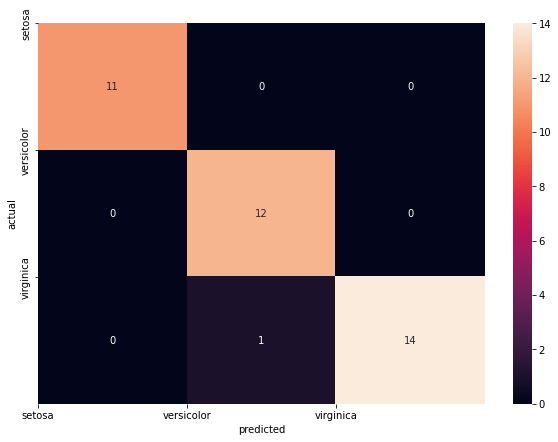

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.xticks([0,1,2], labels = iris.target_names)
plt.yticks([0,1,2], labels = iris.target_names)

In [37]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       0.92      1.00      0.96        12\n           2       1.00      0.93      0.97        15\n\n    accuracy                           0.97        38\n   macro avg       0.97      0.98      0.98        38\nweighted avg       0.98      0.97      0.97        38\n'

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38

